In [40]:
import numpy as np
import matplotlib.pyplot as plt


In [41]:
I_0 = 1 #for simplicity and could be adapted with weights
eta = 376.7

def U_dipole(k,l,theta):
    U = (eta*k**2)/(32*np.pi**2)*(l**2)*np.sin(theta)**2
    return U

def U_standing_wave(k,l, theta):
    U = (eta)/(8*np.pi**2*np.sin(theta)**2)*(np.cos(np.cos(theta)*(k*l)/2)-np.cos((k*l)/2))**2
    return U

def U_half_wave(k, l, theta):
    k = 2*np.pi
    l= 1/2
    return U_standing_wave(k, l, theta)

def get_U(atype,k,l,theta):
    """
    1: dipole
    2: standing wave
    3: half wave
    """
    if atype == 1:
        return U_dipole(k,l,theta)
    elif atype == 2:
        return U_standing_wave(k,l,theta)
    elif atype == 3:
        return U_half_wave(k,l,theta)
    else:
        return None
    

In [42]:
def C_k(k,l, weights, positions, theta, phi):
    """
    k: wavenumber
    l: length of the antennas !in units of lambda!
    weights: list of each weight a_n
    positions: list of position of each antenna (x, y, z) !coordinates in units of lambda!
    """
    N = len(weights) #length of the array i.e number of element in the array
    k_x = k*np.sin(theta)*np.cos(phi)
    k_y = k*np.sin(theta)*np.sin(phi)
    k_z = k*np.cos(theta)
    wavelength = 2*np.pi/k
    C = 0
    for n in range(1, N):
        x = positions[n][0]*wavelength
        y = positions[n][1]*wavelength
        z = positions[n][2]*wavelength
        term1 = k_x*x
        term2 = k_y*y
        term3 = k_z*z
        C += weights[n]*np.exp(1j*(term1+term2+term3))
    return C

In [43]:
def convert_in_dB(U):
    return 10*np.log10(U)

In [44]:
def find_beamwidth(U, phi):
    """
    U must be normalized
    U: radiation intensity array taking values for each phi
    
    """
    #Normalize U in case
    U = U/np.max(U)
    intensity = U
    
    # Find -3 dB beamwidth (half-power points, i.e., intensity >= 0.5)
    threshold = 0.5
    above_threshold = np.where(intensity >= threshold)[0]
    
    if len(above_threshold) == 0:
        print("No beamwidth found, signal may be too weak or improperly defined.")
        return None, None
 
    
    # Find where there are gaps (non-continuous parts)
    diffs = np.diff(above_threshold)
    splits = np.where(diffs > 1)[0]  # Identify where the gaps are
    
    # If there are no gaps, the whole array is continuous
    if len(splits) == 0:
        beam_idx = above_threshold
    else:
        # Split into continuous segments and find the longest one
        blocks = np.split(above_threshold, splits + 1)
        beam_idx = min(blocks, key=len)
        
    
    # Find the angles corresponding to the continuous region
    phi_beam = phi[beam_idx]
    beamwidth_deg = np.degrees(phi_beam[-1] - phi_beam[0])
    
    return phi_beam[0],  phi_beam[-1], beamwidth_deg

In [45]:
def C_k(k,l, weights, positions, theta, phi):
    """
    k: wavenumber
    l: length of the antennas !in units of lambda!
    weights: list of each weight a_n
    positions: list of position of each antenna (x, y, z) !coordinates in units of lambda!
    """
    N = len(weights) #length of the array i.e number of element in the array
    k_x = k*np.sin(theta)*np.cos(phi)
    k_y = k*np.sin(theta)*np.sin(phi)
    k_z = k*np.cos(theta)
    wavelength = 2*np.pi/k
    C = 0
    for n in range(0, N):
        x = positions[n][0]*wavelength
        y = positions[n][1]*wavelength
        z = positions[n][2]*wavelength
        term1 = k_x*x
        term2 = k_y*y
        term3 = k_z*z
        C += weights[n]*np.exp(1j*(term1+term2+term3))
        
    
    return C

def power_gain(k,l, weights, positions, theta, phi, atype):
    """
    atype: antenna type(0: power gain only 1: dipole, 2: standing wave antenna, 3: half wave antenna)
    """
    C = C_k(k,l, weights, positions, theta, phi)
    C = abs(C)**2
    if atype != 0:
        U = get_U(atype,k,l,theta)
        C = U*C
    return C

def power_gain_dB(g):
    g = np.maximum(convert_in_dB(g), -20)
    g = (g + 20) / 20
    return g #normalized
def plot_powergain_2D(k, l, weights, positions, atype):
    theta = np.pi/2 
    phi = np.linspace(0, 2*np.pi, 800)
    g = power_gain(k, l, weights, positions, theta, phi, atype)
    g = g/np.max(g)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(phi, g, linewidth=1)
    
    ax.set_title(f'Normalized Radiation Pattern')
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Optional: radius ticks
    ax.grid(True)
    
    ax.legend()
    plt.show()
    
    #Now in dB
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(phi, power_gain_dB(g), linewidth=1)
    
    ax.set_title(f'Normalized Radiation Pattern (dB)')
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Optional: radius ticks
    ax.grid(True)
    
    ax.legend()
    plt.show()

C:\Users\yanis\AppData\Local\Temp\ipykernel_61376\1725789439.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


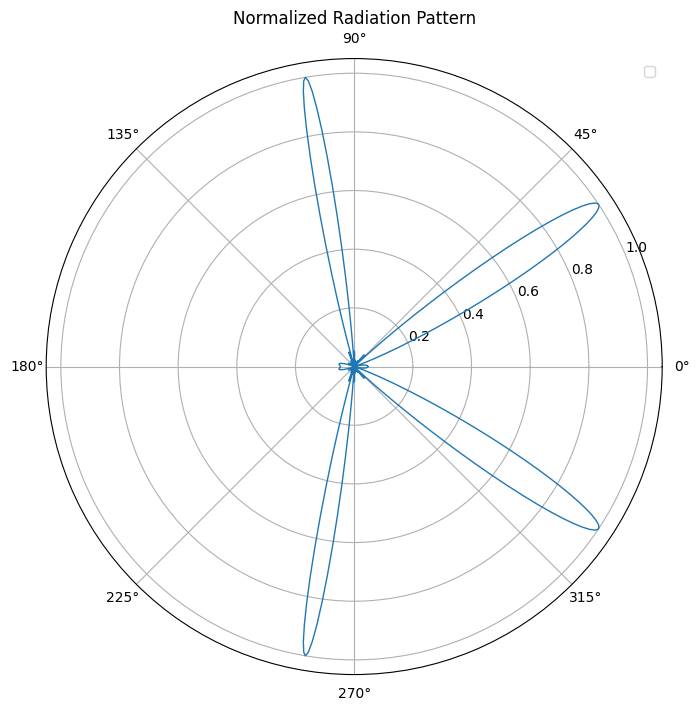

C:\Users\yanis\AppData\Local\Temp\ipykernel_61376\1725789439.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


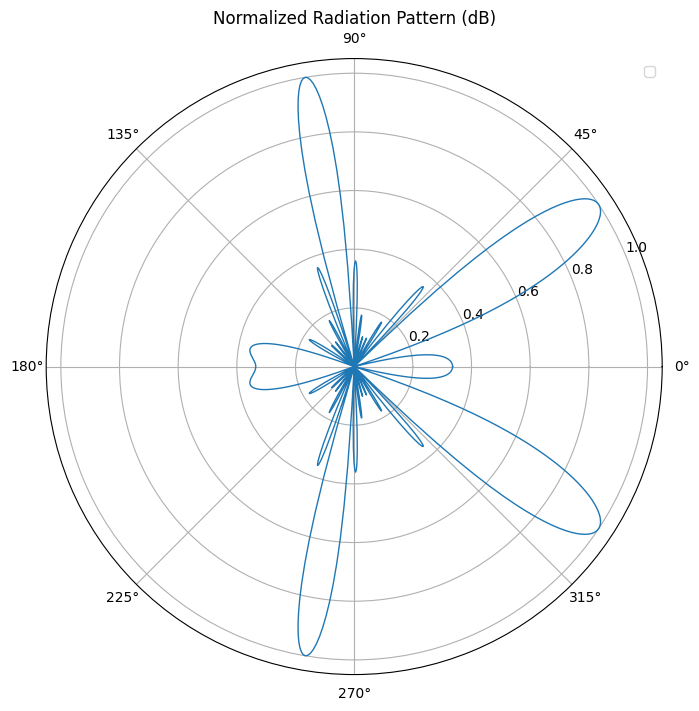

In [50]:
N = 8
d = 1
alpha = 45
alpha=alpha*np.pi/180
psi_shift=2*np.pi*d*np.cos(alpha)
z=np.exp(1j*psi_shift)
weights = [z**n for n in range(N)] #example weights = [1]*N
positions = [(n*d, 0, 0) for n in range(N)]
k = 1
l= 1
plot_powergain_2D(k, l, weights, positions, 0)